In [ ]:
import os
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

In [ ]:
!pip install pycaret

In [ ]:
import time
import numpy as np
import pandas as pd

from pycaret.datasets import get_data
from pycaret.time_series import TSForecastingExperiment

In [ ]:
data = pd.read_csv('/content/AirPassengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data = data.set_index('Month')

In [ ]:
forecast_horizon = 12
folds = 3

fig_settings = {
    "renderer": "png",
    "width": 1000,
    "height": 600,
}

In [ ]:
experiment = TSForecastingExperiment()
experiment.setup(data=data, target='#Passengers', fh=forecast_horizon, fig_kwargs=fig_settings)

,Description,Value
0,session_id,3833
1,Target,#Passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
experiment.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [ ]:
experiment.setup(data=data, fh=forecast_horizon, fold=folds, fig_kwargs=fig_settings, session_id=42)

,Description,Value
0,session_id,42
1,Target,#Passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
model = experiment.create_model("arima", order=(1, 1, 0), seasonal_order=(0, 1, 0, 12))

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.3535,0.4103,10.3216,13.4315,0.0255,0.0260,0.9413
1,1957-12,0.6844,0.6853,20.9235,23.2653,0.0581,0.0560,0.8582
2,1958-12,1.5988,1.4673,45.6850,47.6955,0.1066,0.1132,0.4911
Mean,NaT,0.8789,0.8543,25.6434,28.1308,0.0634,0.0651,0.7635
SD,NaT,0.5267,0.4477,14.8178,14.4051,0.0333,0.0362,0.1956


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
predictions = experiment.predict_model(model)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,0.6999,0.7757,21.3121,26.7998,0.0480,0.0462,0.8703


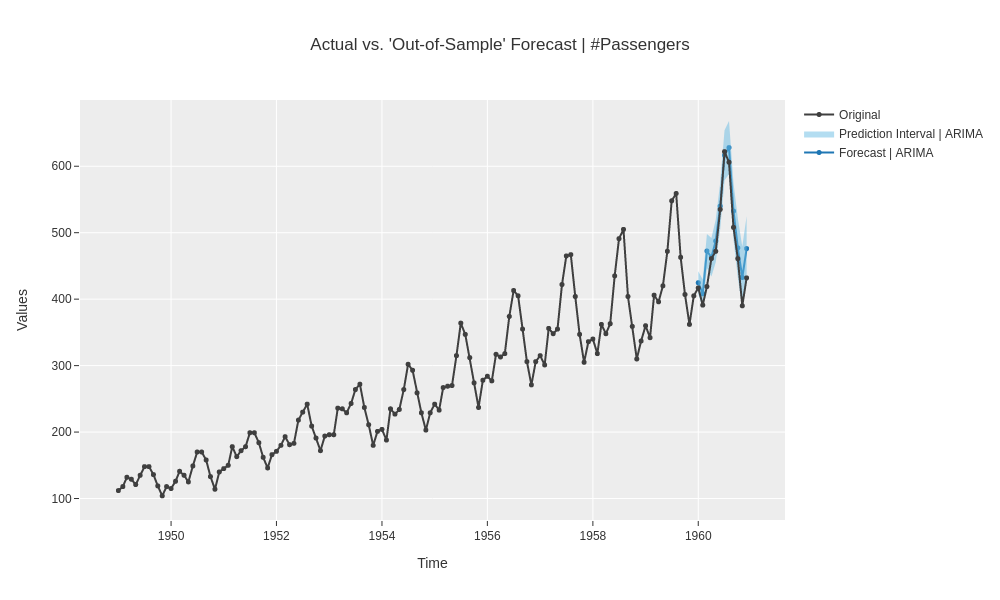

In [ ]:
experiment.plot_model(estimator=model)

In [ ]:
experiment.check_stats(model)

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Residual,Length,,131.0
1,Summary,Statistics,Residual,# Missing Values,,0.0
2,Summary,Statistics,Residual,Mean,,-0.445207
3,Summary,Statistics,Residual,Median,,-0.9606
4,Summary,Statistics,Residual,Standard Deviation,,11.759243
5,Summary,Statistics,Residual,Variance,,138.27979
6,Summary,Statistics,Residual,Kurtosis,,4.244741
7,Summary,Statistics,Residual,Skewness,,-0.938657
8,Summary,Statistics,Residual,# Distinct Values,,127.0
9,White Noise,Ljung-Box,Residual,Test Statictic,"{'alpha': 0.05, 'K': 24}",21.29991


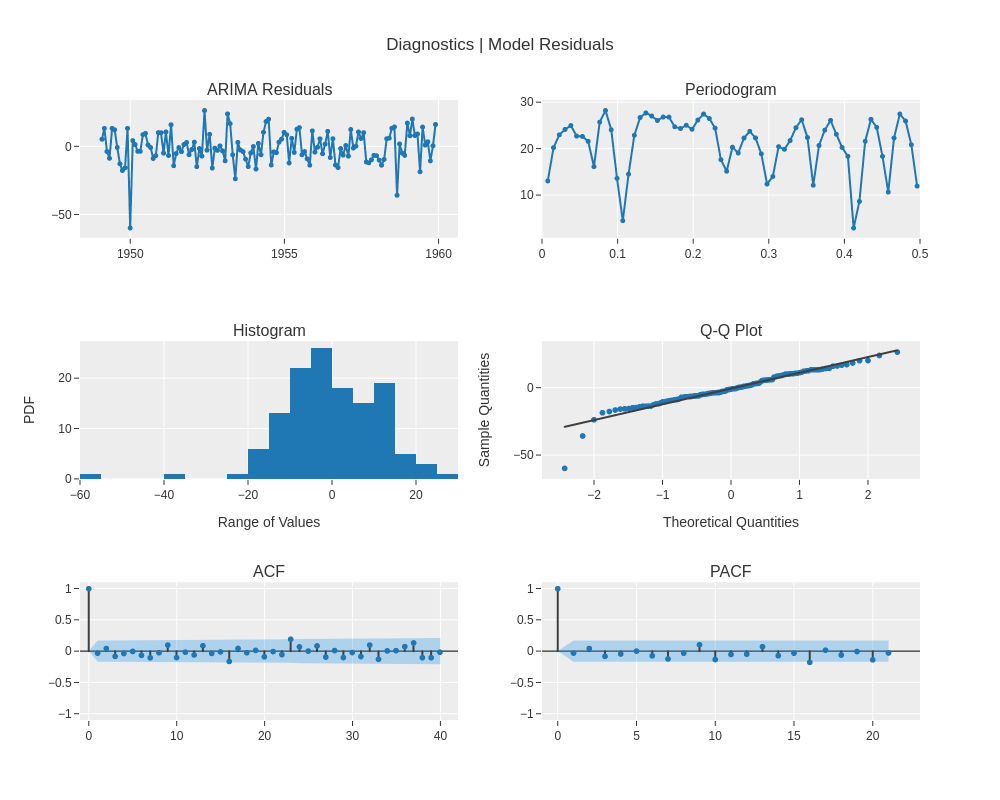

In [ ]:
experiment.plot_model(model, plot='diagnostics', fig_kwargs={"height": 800, "width": 1000})

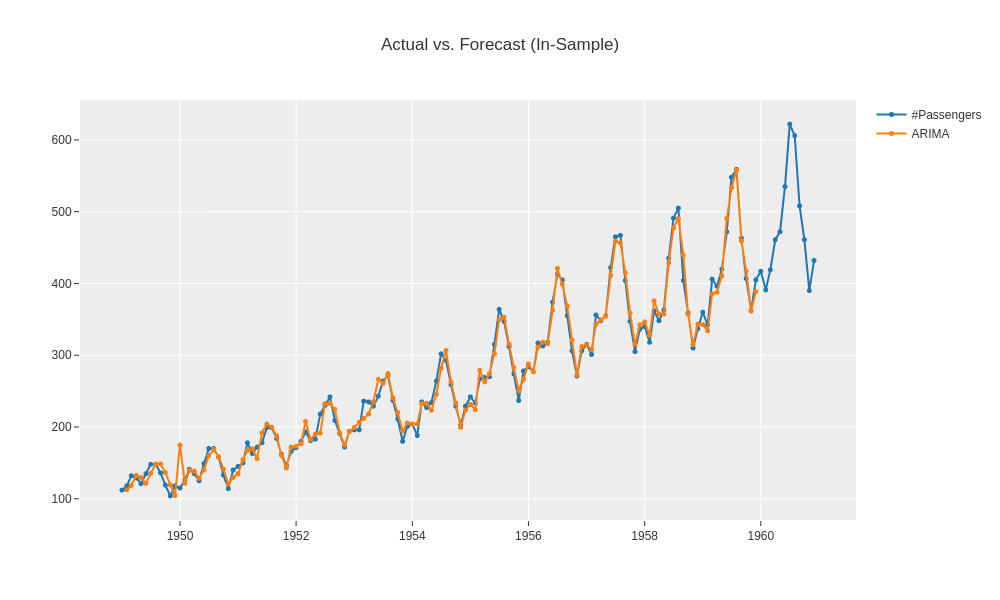

In [ ]:
experiment.plot_model(model, plot='insample')

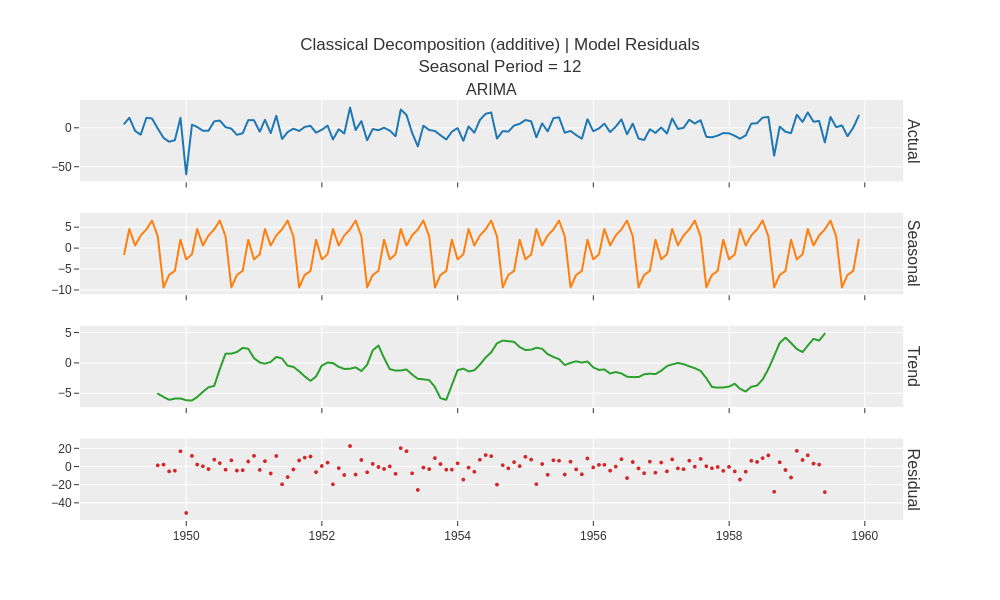

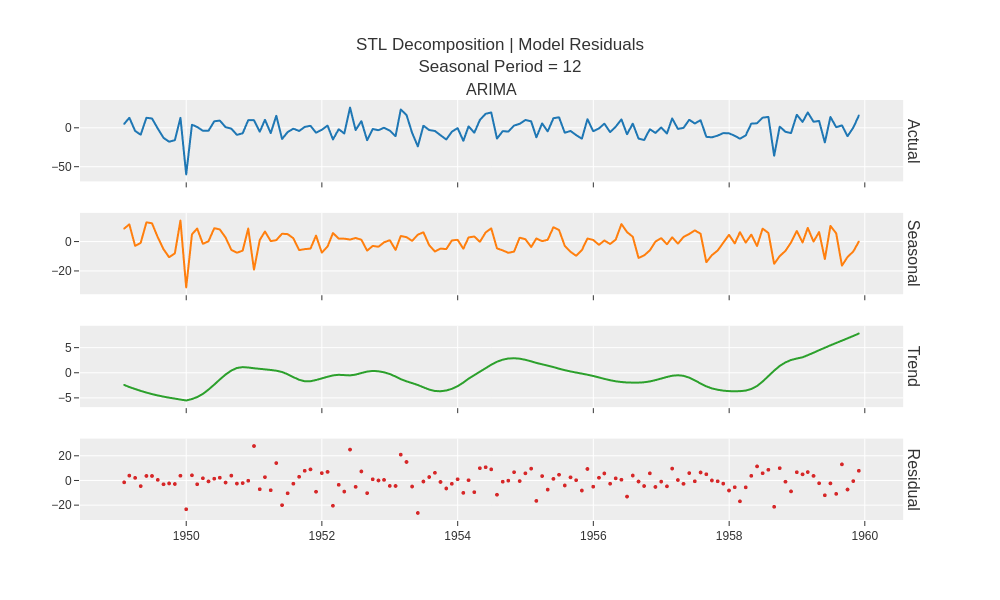

In [ ]:
experiment.plot_model(model, plot="decomp")
experiment.plot_model(model, plot="decomp_stl")

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.7545,0.9171,22.0339,30.0192,0.0538,0.0562,0.7067
1,1957-12,0.8044,0.8105,24.5938,27.5155,0.0646,0.0634,0.8017
2,1958-12,0.8880,1.0076,25.3731,32.7521,0.0543,0.0565,0.7600
Mean,NaT,0.8156,0.9117,24.0002,30.0956,0.0575,0.0587,0.7561
SD,NaT,0.0551,0.0805,1.4264,2.1385,0.0050,0.0034,0.0389


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,LGBMRegressor,0.8837,0.9749,26.9090,33.6827,0.0531,0.0549,0.7952


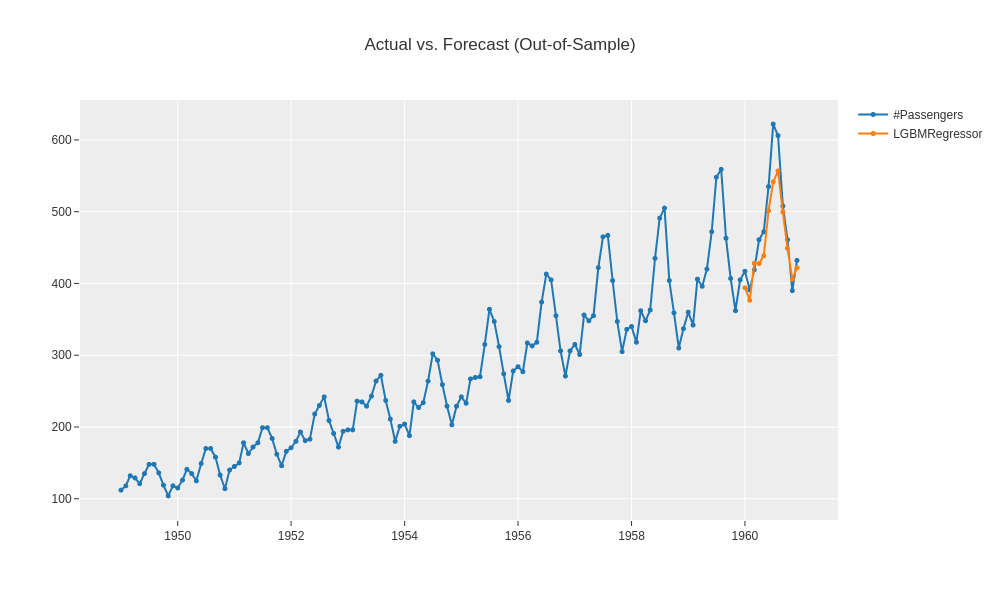

In [ ]:
model = experiment.create_model("lightgbm_cds_dt")
predictions = experiment.predict_model(model)
experiment.plot_model(estimator=model)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.3579,0.4283,10.4519,14.0196,0.0263,0.0265,0.9360
1,1957-12,1.0488,1.0486,32.0663,35.5979,0.0900,0.0852,0.6680
2,1958-12,0.4800,0.5406,13.7143,17.5717,0.0322,0.0318,0.9309
Mean,NaT,0.6289,0.6725,18.7442,22.3964,0.0495,0.0478,0.8450
SD,NaT,0.3011,0.2699,9.5138,9.4468,0.0288,0.0265,0.1252


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   23.1s finished


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging

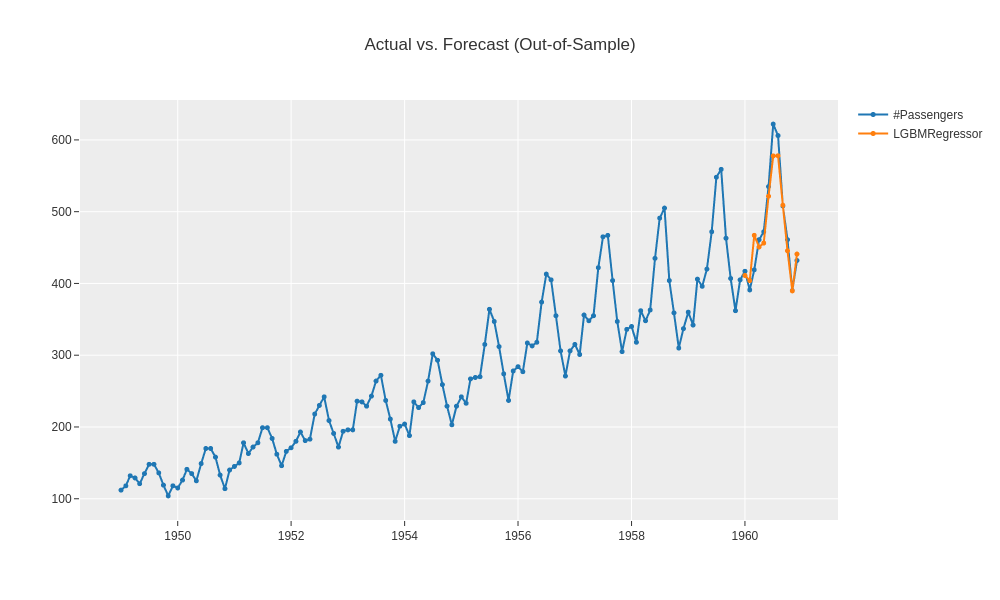

In [ ]:
tuned_model = experiment.tune_model(model)
experiment.plot_model(estimator=tuned_model)

In [ ]:
print(model)
print(tuned_model)

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                        10, 9,
                                                                        8, 7, 6,
                                                                        5, 4, 3,
                                                                        2, 1]},
                                                   n_jobs=1)],
                    regressor=LGBMRegressor(n_jobs=-1, random_state=42), sp=12,
                    window_length=12)
BaseCdsDtForecaster(degree=2, deseasonal_model='multiplicative',
                    fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                        10, 9,
                                                                        8, 7, 6,
                                                                        5, 4, 3,
                                

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging

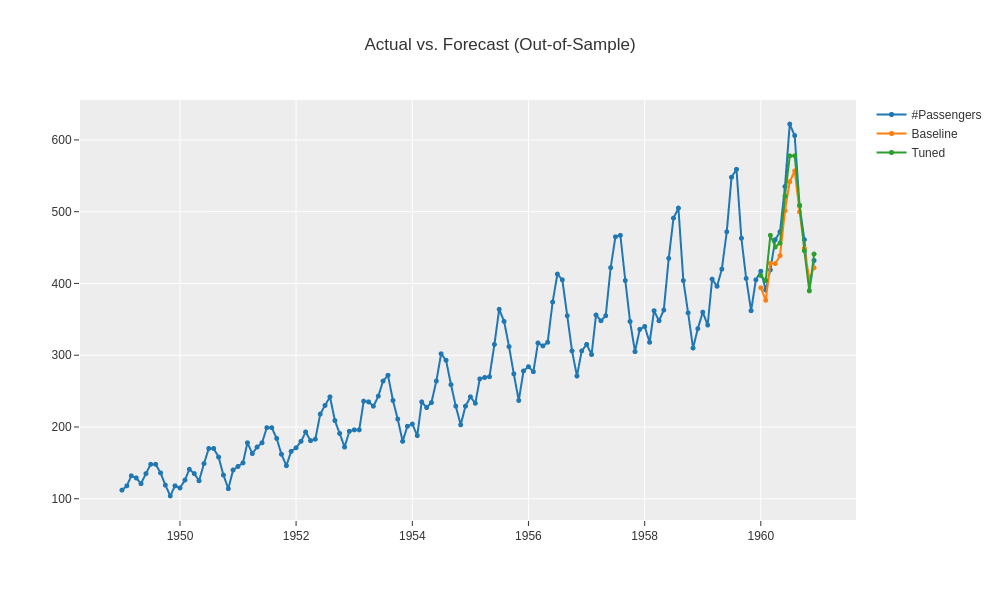

In [ ]:
experiment.plot_model([model, tuned_model], data_kwargs={"labels": ["Baseline", "Tuned"]})

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging

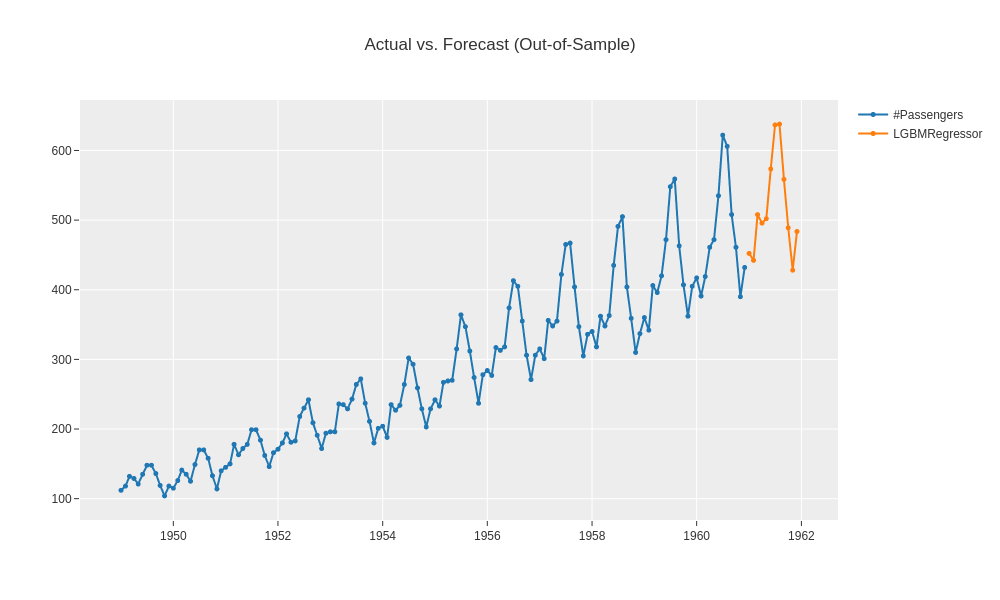

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging

,y_pred
1961-01,452.1794
1961-02,442.2188
1961-03,507.8725
1961-04,495.6355
1961-05,502.0727
1961-06,573.4596
1961-07,636.7021
1961-08,637.8523
1961-09,558.5107
1961-10,488.9473


In [ ]:
final_model = experiment.finalize_model(tuned_model)
experiment.plot_model(final_model)
experiment.predict_model(final_model)

In [ ]:
print(tuned_model)
print(final_model)

BaseCdsDtForecaster(degree=2, deseasonal_model='multiplicative',
                    fe_target_rr=[WindowSummarizer(lag_feature={'lag': [12, 11,
                                                                        10, 9,
                                                                        8, 7, 6,
                                                                        5, 4, 3,
                                                                        2, 1]},
                                                   n_jobs=1)],
                    regressor=LGBMRegressor(bagging_freq=5, colsample_bytree=1,
              learning_rate=0.002555136140832446, max_depth=8,
              min_child_samples=78, n_estimators=224, n_jobs=-1, num_leaves=253,
              random_state=42, reg_alpha=3.1441277090264217e-10,
              reg_lambda=3.7899513783298367e-07, subsample=1),
                    sp=12, window_length=13)
ForecastingPipeline(steps=[('forecaster',
                            Tran

In [ ]:
_ = experiment.save_model(final_model, "my_final_model")

Transformation Pipeline and Model Successfully Saved


In [ ]:
experiment_load = TSForecastingExperiment()
loaded_model = experiment_load.load_model("my_final_model")

Transformation Pipeline and Model Successfully Loaded


In [ ]:
experiment_load.predict_model(loaded_model)

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging

,y_pred
1961-01,452.1794
1961-02,442.2188
1961-03,507.8725
1961-04,495.6355
1961-05,502.0727
1961-06,573.4596
1961-07,636.7021
1961-08,637.8523
1961-09,558.5107
1961-10,488.9473


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging

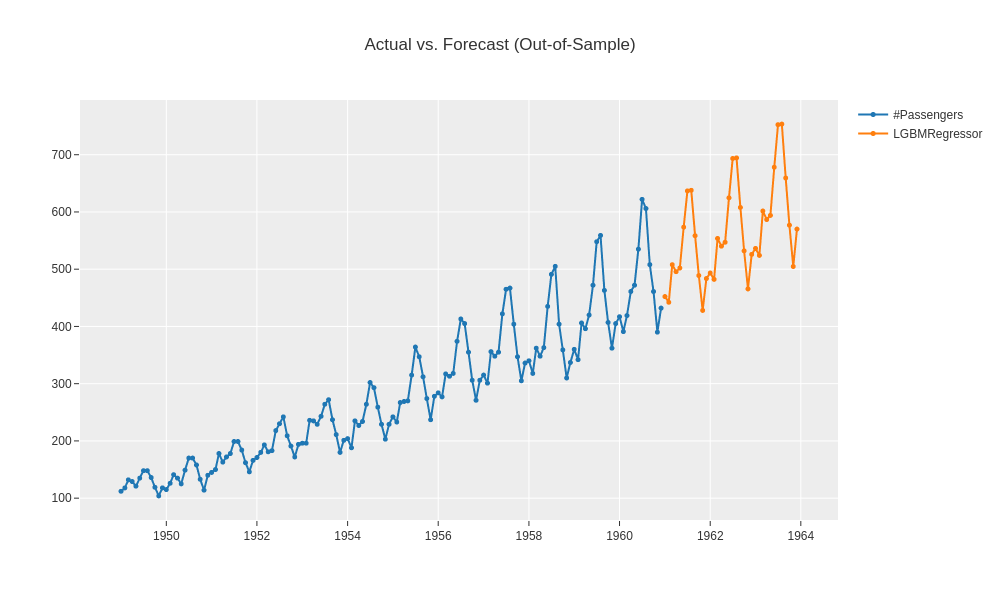

In [ ]:
experiment.plot_model(estimator=final_model, data_kwargs={'fh': 36})